In [1]:
%matplotlib inline

This is a short example of how the DNA agarose gel electrophoresis in pydna can be used.
The %matplotlib inline in the line above is there to facilitate viewing matplotlib plots in    

## Pydna Gel Electrophoresis Simulation

In [2]:
from pydna.gel import weight_standard_sample, Gel

In [3]:
st = weight_standard_sample('1kb+_GeneRuler')

In [4]:
from pydna.genbank import Genbank

In [5]:
gb = Genbank("bjornjobb@gmail.com")

In [6]:
gene = gb.nucleotide("X06997")

In [7]:
from pydna.parsers import parse_primers

In [8]:
primer_f, primer_r =      parse_primers(''' >760_KlLAC12_rv (20-mer)
                                             ttaaacagattctgcctctg

                                             >759_KlLAC12_fw (19-mer)
                                             aaatggcagatcattcgag
                                         ''')

In [9]:
from pydna.amplify import pcr

In [10]:
# PCR
pcr_prod = pcr(primer_f, primer_r, gene)

In [11]:
pcr_prod

Amplicon(1766)

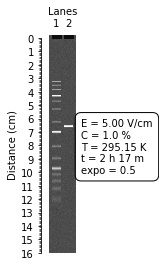

In [13]:
Gel([ st,[pcr_prod]] , gel_len=16).run()

In [15]:
from pydna.dseqrecord import Dseqrecord

In [18]:
from pydna import all

In [21]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils.CheckSum import seguid

In [22]:
GUP1rec1sens = SeqRecord(Seq("gaattcgatatcaagcttatcgataccgatgtcgctgatcagcatcctgtctcc"))
GUP1rec2AS =   SeqRecord(Seq("gacataactaattacatgactcgaggtcgactcagcattttaggtaaattccg"))

In [43]:
GUP1 = read("/home/jovyan/work/scripts/pGUP1/GUP1_locus.gb")

In [27]:
insert = pcr(GUP1rec1sens, GUP1rec2AS, GUP1)

In [31]:
insert.figure()

                            5atgtcgctgatcagcatcctgtctcc...cggaatttacctaaaatgctga3
                                                          |||||||||||||||||||||| tm 54.5 (dbd) 63.1
                                                         3gccttaaatggattttacgactcagctggagctcagtacattaatcaatacag5
5gaattcgatatcaagcttatcgataccgatgtcgctgatcagcatcctgtctcc3
                             |||||||||||||||||||||||||| tm 65.2 (dbd) 75.1
                            3tacagcgactagtcgtaggacagagg...gccttaaatggattttacgact5

In [32]:
pGREG505 = read("/home/jovyan/work/scripts/pGUP1/pGREG505.gb")

In [33]:
from Bio.Restriction import SalI

In [36]:
linear_vector, his3 = pGREG505.cut(SalI)

In [39]:
linear_vector.list_features()

+----------+-----------+-------+------+--------+--------------+--------------+------+
| Feature# | Direction | Start | End  | Length | id           | type         | orf? |
+----------+-----------+-------+------+--------+--------------+--------------+------+
| 0        |    -->    |  271  | 305  |     34 | <unknown id> | misc_recomb  |  no  |
| 1        |    -->    |  1773 | 1807 |     34 | <unknown id> | misc_recomb  |  no  |
| 2        |    <--    |  1842 | 1863 |     21 | <unknown id> | primer_bind  |  no  |
| 3        |    <--    |  1871 | 1889 |     18 | <unknown id> | primer_bind  |  no  |
| 4        |    -->    |  1959 | 2028 |     69 | <unknown id> | CDS          |  no  |
| 5        |    -->    |  2032 | 2488 |    456 | <unknown id> | rep_origin   |  no  |
| 6        |    -->    |  2049 | 2356 |    307 | <unknown id> | rep_origin   |  no  |
| 7        |    -->    |  5873 | 6536 |    663 | <unknown id> | CDS          | yes  |
| 8        |    -->    |  6630 | 7313 |    683 | <unkn

In [45]:
from pydna.assembly import Assembly

In [47]:
assembly_product = Assembly((insert, linear_vector), limit=28)

In [48]:
assembly_product

Assembly:
Sequences........................: [1742] [8301]
Sequences with shared homologies.: [1742] [8301]
Homology limit (bp)..............: 28
Number of overlaps...............: 2
Nodes in graph(incl. 5' & 3')....: 4
Only terminal overlaps...........: No
Circular products................: [9981]
Linear products..................: [10013] [10011] [32] [30]

In [54]:
pGUP1 = assembly_product.circular_products[0]
pGUP1

Contig(o9981)

In [63]:
sync(pGUP1, pGREG505)
#  moved to Dseqrecord method:
#  https://github.com/BjornFJohansson/pydna/blob/cbb04a8fec85d24718a30042c1499584998bd705/pydna/dseqrecord.py#L1297

NameError: name 'sync' is not defined

In [71]:
rotated = pGUP1.synced(pGREG505)

In [73]:
# and now for some pcr...

In [146]:
from pydna.parsers import parse
from pydna.amplify import Anneal
from pydna.dseqrecord import Dseqrecord
from Bio.SeqRecord import SeqRecord
# from pydna.seqrecord import SeqRecord

In [147]:
template = Dseqrecord("tacactcaccgtctatcattatctactatcgactgtatcatctgatagcac", name="mystery sample")

In [161]:
p1 = SeqRecord("ntacactcaccgtctatcattatc", name="primer1", id="p1")
p2 = SeqRecord("ngtgctatcagatgatacagtcg", name="primer2", id="p2")

In [162]:
p1, p2

(SeqRecord(seq='ntacactcaccgtctatcattatc', id='p1', name='primer1', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq='ngtgctatcagatgatacagtcg', id='p2', name='primer2', description='<unknown description>', dbxrefs=[]))

In [163]:
ann = Anneal((p1, p2), template)

In [164]:
print(ann.report())

Template mystery sample 51 nt linear:
Primer primer1 anneals forward at position 23

Primer primer2 anneals reverse at position 29


In [165]:
ann.products

[Amplicon(53)]

In [166]:
amplicon_list = ann.products

In [167]:
amplicon = amplicon_list.pop()

In [168]:
amplicon

Amplicon(53)

In [169]:
amplicon.forward_primer, amplicon.reverse_primer

(p1 24-mer:5'-ntacactcaccgtct..atc-3', p2 23-mer:5'-ngtgctatcagatga..tcg-3')

In [171]:
amplicon.reverse_primer.footprint

'gtgctatcagatgatacagtcg'

In [174]:
amplicon.figure()
# error b/c footprint returns a string I think

AttributeError: 'str' object has no attribute 'reverse_complement'

In [175]:
print(amplicon)

Dseqrecord
circular: False
size: 53
ID: 53bp 2lnxc7yOqDEAtOsRLJKTxXME8tE
Name: 53bp_PCR_prod
Description: Product_<unknown description>_<unknown description>
Number of features: 4
/date=16-MAR-2018
Dseq(-53)
ntac..cacn
natg..gtgn


In [176]:
print(amplicon.program())


Taq (rate 30 nt/s) 35 cycles             |53bp
95.0°C    |95.0°C                 |      |Tm formula: Biopython Tm_NN
|_________|_____          72.0°C  |72.0°C|SaltC 50mM
| 03min00s|30s  \         ________|______|Primer1C 1.0µM
|         |      \ 45.3°C/ 0min 2s| 5min |Primer2C 1.0µM
|         |       \_____/         |      |GC 37%
|         |         30s           |      |4-12°C


In [177]:
# now lets try the pcr convenience function...

In [178]:
from pydna.amplify import pcr

In [182]:
amplicon2 = pcr(p1, p2, template)

In [184]:
amplicon2.figure()

AttributeError: 'str' object has no attribute 'reverse_complement'

In [186]:
from pydna.amplicon import Amplicon

In [192]:
amplicon3 = Amplicon(template, template=template, forward_primer=p1, reverse_primer=p2.reverse_complement)

In [193]:
amplicon3

Amplicon(51)